### Q1

In [1]:
%matplotlib inline
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import manifold

In [2]:
url = "https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.digits/train.3"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')))
data = np.array(c, dtype='float32')

##### (a)

In [3]:
X = np.transpose(data) # transpose to set up the matrix in pxn
X.shape

(256, 657)

##### (b)

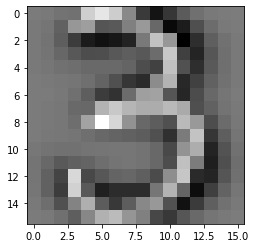

In [4]:
mu = np.mean(X, axis=0)
n = X.shape[1]
I = np.identity(n)
H = I - np.ones((n, n))/n
X_tilda = X.dot(H)
X_tilda = np.transpose(X_tilda)
X_tilda_1 = np.reshape(X_tilda[0,:],(16,16))
imgshow = plt.imshow(X_tilda_1,cmap='gray')  # plot one of X_tilda

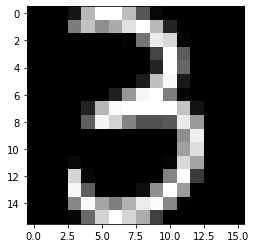

In [5]:
X = np.transpose(X)
X_1 = np.reshape(X[0,:],(16,16))
imgshow = plt.imshow(X_1,cmap='gray') # plot one of X for comparison

##### (c)

In [6]:
pca = PCA(n_components=100, svd_solver='arpack')
pca.fit(X)
lambda_hat = pca.explained_variance_ratio_
sum = 0
for i in range(len(lambda_hat)):
    sum += lambda_hat[i]
    if sum >= 0.95:
        break
print("k: ", i)
print(sum)
lambda_hat = lambda_hat[:i+1]
print(lambda_hat)


k:  79
0.9501059527974576
[0.1267004  0.08807438 0.07850233 0.07322889 0.05643803 0.04313744
 0.04034266 0.03147187 0.02789812 0.02585432 0.02244253 0.0198131
 0.01891271 0.01705536 0.01520566 0.01320665 0.01272691 0.01124945
 0.0107983  0.00983153 0.00893955 0.0088906  0.00826263 0.0078106
 0.00749531 0.00714053 0.00668305 0.0063375  0.00601149 0.00597096
 0.00579235 0.00542326 0.0053776  0.00504943 0.00478603 0.00462413
 0.00450659 0.00429819 0.00420139 0.00399387 0.0037099  0.00366799
 0.0036275  0.00346326 0.00331891 0.00322114 0.00312332 0.00307179
 0.00288561 0.00270535 0.00266756 0.00252241 0.00245017 0.00234143
 0.00229014 0.00226511 0.00216806 0.00207748 0.00202615 0.00196345
 0.00189959 0.00184868 0.00182618 0.00179324 0.00176127 0.00169515
 0.00163857 0.00156677 0.00155961 0.00148573 0.00145867 0.00142418
 0.00139668 0.00134448 0.00132528 0.00128401 0.00123585 0.00121125
 0.00116261 0.00113575]


##### (d)

Text(0, 0.5, 'explained_variance_ratio_')

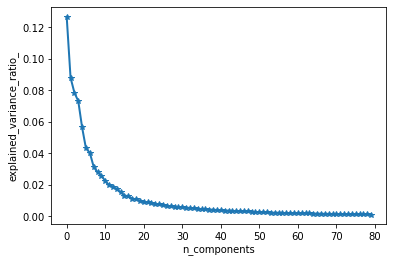

In [7]:
plt.plot(lambda_hat, "*-", linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

##### (e)

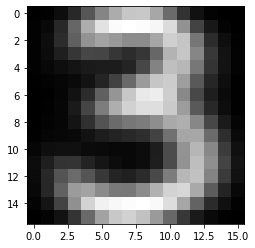

In [8]:
mean_ = pca.mean_
img_mean = np.reshape(mean_,(16,16))
imgshow = plt.imshow(img_mean, cmap='gray')

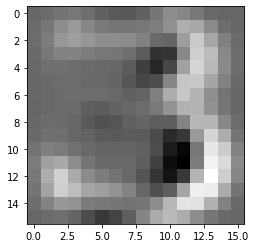

In [9]:
# top-1 component
c_1 = pca.components_[0]
img_c = np.reshape(c_1,(16,16))
imgshow = plt.imshow(img_c, cmap='gray')

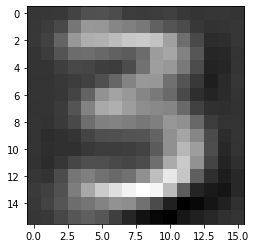

In [10]:
# top-2 component
c_2 = pca.components_[1]
img_c = np.reshape(c_2,(16,16))
imgshow = plt.imshow(img_c, cmap='gray')

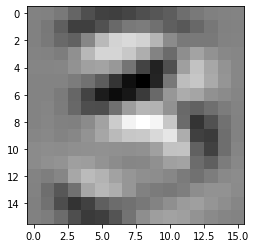

In [11]:
# top-3 component
c_3 = pca.components_[2]
img_c = np.reshape(c_3,(16,16))
imgshow = plt.imshow(img_c, cmap='gray')

##### (f)

In [12]:
# v_1
mean_projection = np.dot(pca.components_[0], mean_)
v1_list = []
for i in range(X.shape[0]):
    v_1 = (np.dot(pca.components_[0], (X[i, :]) - mean_))
    v1_list.append((i, v_1))
v_1_sorted = sorted(v1_list, key = lambda v: v[1])
print(v_1_sorted)

[(468, -6.645486), (117, -6.513581), (83, -6.491007), (279, -6.4350677), (149, -6.3040915), (445, -6.1965837), (479, -6.1658), (35, -6.1340613), (441, -6.091203), (164, -6.0474224), (447, -6.046482), (237, -5.920013), (126, -5.8208675), (408, -5.807221), (77, -5.8028593), (169, -5.7531533), (23, -5.598782), (182, -5.594572), (363, -5.5931435), (253, -5.592626), (139, -5.5634966), (162, -5.505336), (249, -5.4499745), (192, -5.4057035), (389, -5.3895273), (402, -5.372111), (172, -5.2239094), (655, -5.2210293), (245, -5.1987524), (554, -5.1986275), (359, -5.1947336), (71, -5.139819), (390, -5.129386), (457, -5.107191), (262, -5.1054087), (308, -5.030406), (565, -5.015047), (533, -5.0139866), (47, -5.007893), (154, -4.989974), (282, -4.9439893), (406, -4.9382944), (341, -4.916917), (588, -4.878711), (100, -4.873906), (20, -4.8690615), (76, -4.8644514), (25, -4.855574), (305, -4.8485804), (525, -4.816028), (579, -4.771864), (272, -4.6932154), (640, -4.689478), (614, -4.6666903), (110, -4.65

##### (g)

In [13]:
# v_2
mean_projection = np.dot(pca.components_[1], mean_)
v2_list = []
for i in range(X.shape[0]):
    v_2 = (np.dot(pca.components_[1], (X[i, :]) - mean_ - v1_list[i][1]*pca.components_[0]))
    v2_list.append((i, v_2))

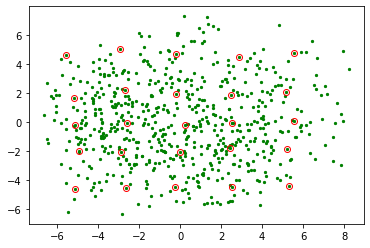

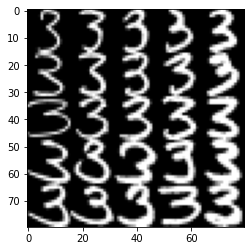

In [14]:
points = []
for i in range(X.shape[0]):
    points.append([v1_list[i][1], v2_list[i][1]])
points = np.array(points)
# quantile points
v1_percentile = np.quantile(points[:, 0], [0.05, 0.25, 0.50, 0.75, 0.95], interpolation='lower')
v2_percentile = np.quantile(points[:, 1], [0.05, 0.25, 0.50, 0.75, 0.95], interpolation='lower')
v1_percentile_index = []
v2_percentile_index = []

# scatter plot for projection
plt.figure()
plt.scatter(points[:, 0], points[:, 1], c='g', s=5)
img = np.zeros([16*5, 16*5])
for i in range(5):
    for j in range(5):
        point = [v1_percentile[i], v2_percentile[j]]
        point_index = (np.sum((points[:, :] - point)**2, axis=1)).argmin()
        plt.plot(points[point_index, 0], points[point_index, 1], 'o', markerfacecolor='none', c='r')
        
        # corresponding images
        img[16*i:16*(i+1), 16*j:16*(j+1)] = np.reshape(X[point_index,:],(16,16))

# plot corresponding images
plt.figure()
plt.imshow(img, cmap='gray')

To compare with the figure in ESL book: (there are some tiny differences, such as the bottom-right corner point)

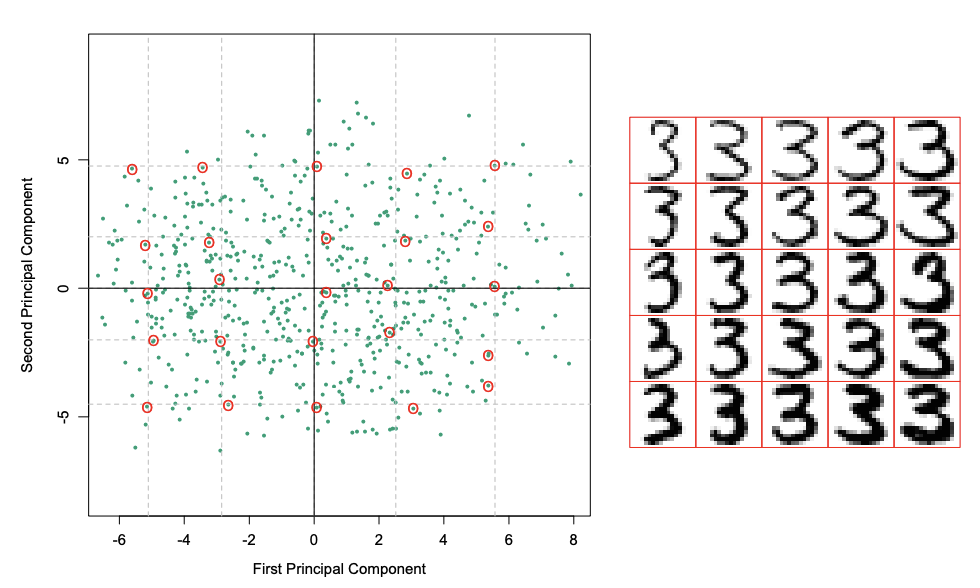

##### (h)* Parallel analysis

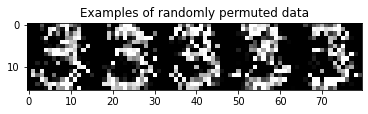

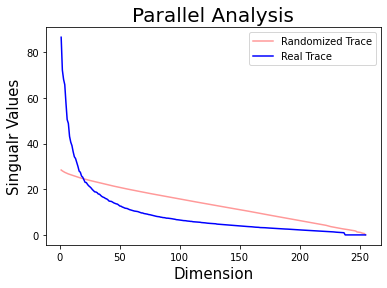

In [15]:
# permutation
X_permute = np.copy(X)
m = X.shape[1]

pca = PCA(n_components=m-1, svd_solver='arpack')
pca.fit(X)
lambda_hat = pca.explained_variance_ratio_

sum_eigens = np.empty(X.shape[1]-1)
# Repeat 100 times
for r in range(100):
    # Permutation
    for i in range(m):
        X_permute[:, i] = np.random.permutation(X_permute[:, i])  
    pca_random = PCA(n_components=m-1, svd_solver='arpack')
    pca_random.fit(X_permute)
    sum_eigens = sum_eigens + pca_random.singular_values_

    if r == 0:
        img = np.zeros([16, 16*5])
        for i in range(5):
            img[:, 16*i:16*(i+1)] = np.reshape(X_permute[i, :],(16,16))
        plt.imshow(img,cmap='gray')
        plt.title("Examples of randomly permuted data")
        
# Average over the number of runs
avg_eigens = sum_eigens / 100

plt.figure()
plt.plot(range(1, m), avg_eigens, 'r', label='Randomized Trace', alpha=0.4)
plt.plot(range(1, m), pca.singular_values_, 'b', label='Real Trace')

plt.title('Parallel Analysis', {'fontsize': 20})
plt.xlabel('Dimension', {'fontsize': 15})
# plt.xticks(ticks=range(1, m+1), labels=range(1, m+1))
plt.ylabel('Singualr Values', {'fontsize': 15})
plt.legend()

### Q2
##### (a)

In [16]:
dist = {'beijing':{'beijing':0, 'shanghai':1070.48, 'xian':913.89, 'wuhan':1057.09, 'guangzhou':1890.71, 'nanjing':902.02, 'hongkong':1973.70},
        'shanghai':{'beijing':1070.48, 'shanghai':0, 'xian':1218.90, 'wuhan':687.30, 'guangzhou':1206.63, 'nanjing':268.02, 'hongkong':1227.83},
        'xian':{'beijing':913.89, 'shanghai':1218.90, 'xian':0, 'wuhan':648.95, 'guangzhou':1309.88, 'nanjing':950.98, 'hongkong':1428.01},
        'wuhan':{'beijing':1057.09, 'shanghai':687.30, 'xian':648.95, 'wuhan':0, 'guangzhou':834.25, 'nanjing':458.49, 'hongkong':922.97},
        'guangzhou':{'beijing':1890.71, 'shanghai':1206.63, 'xian':1309.88, 'wuhan':834.25, 'guangzhou':0, 'nanjing':1129.45, 'hongkong':129.70},
        'nanjing':{'beijing':902.02, 'shanghai':268.02, 'xian':950.98, 'wuhan':458.49, 'guangzhou':1129.45, 'nanjing':0, 'hongkong':1178.23},
        'hongkong':{'beijing':1973.70, 'shanghai':1227.83, 'xian':1428.01, 'wuhan':922.97, 'guangzhou':129.70, 'nanjing':1178.23, 'hongkong':0}}

           beijing  shanghai     xian    wuhan  guangzhou  nanjing  hongkong
beijing       0.00   1070.48   913.89  1057.09    1890.71   902.02   1973.70
shanghai   1070.48      0.00  1218.90   687.30    1206.63   268.02   1227.83
xian        913.89   1218.90     0.00   648.95    1309.88   950.98   1428.01
wuhan      1057.09    687.30   648.95     0.00     834.25   458.49    922.97
guangzhou  1890.71   1206.63  1309.88   834.25       0.00  1129.45    129.70
nanjing     902.02    268.02   950.98   458.49    1129.45     0.00   1178.23
hongkong   1973.70   1227.83  1428.01   922.97     129.70  1178.23      0.00


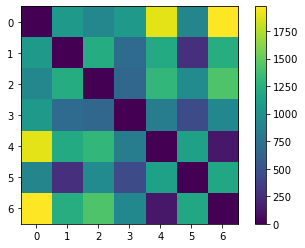

In [17]:
df = pd.DataFrame(dist)
print(df)
D = df.values
plt.imshow(D)
plt.colorbar()


##### (b) & (c)

Eigenvalues are:
 [ 4.91441054e-01  2.39846679e-01  1.42025627e-01  7.02492902e-02
  3.59564913e-02  2.04808585e-02 -1.23063271e-17]


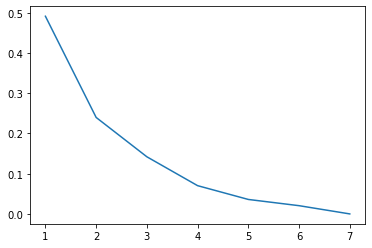

In [19]:
m = np.ones(shape=(len(D),1))*(1/len(D))
C = np.identity(n=len(m)) - np.full(shape=(len(m),len(m)),fill_value=m)
S = -0.5*np.matmul(C,np.matmul(D,np.transpose(C)))
eigen = np.linalg.eig(S)
U = eigen[1]
eigen = sorted(np.array(eigen[0]), reverse=True)
sum_eigen = np.sum(eigen)
print('Eigenvalues are:\n', eigen/sum_eigen)
plt.plot(range(1, 8), eigen/sum_eigen)


There is no negative eigen values. (-1.23063271e-17 is because it is represented as an extremely small negative number for computational reasons)
##### (d)

Eigenvalues are:
 [1502.93064686  733.50185433  434.34439697  214.83718208  109.9625527
   62.63479563    0.        ]


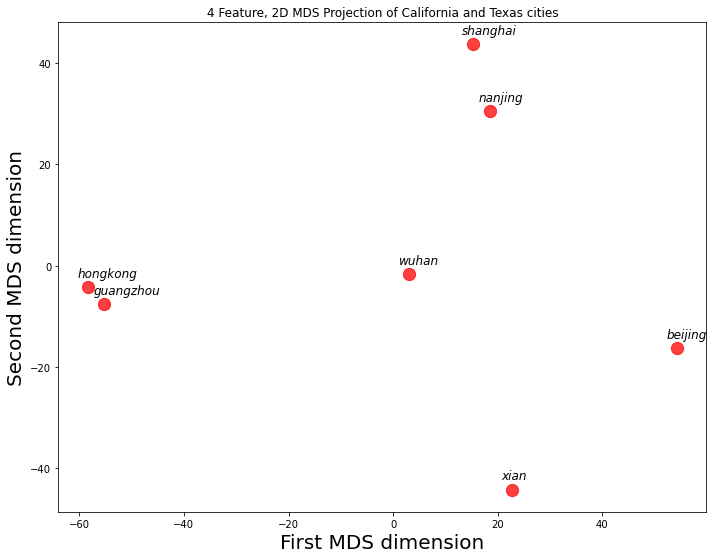

In [20]:
eigen = np.array(eigen)
Lambda = np.where(eigen<=0, 0, eigen)
print('Eigenvalues are:\n',Lambda)

scores = np.matmul(np.sqrt(np.linalg.inv(np.diag(m[:,0]))),np.matmul(U,np.sqrt(np.diag(Lambda))))
x_proj = scores[:,0]
y_proj = scores[:,1]

#plt.style.use('ggplot')
fig1 = plt.figure()
plt.scatter(x_proj[:],y_proj[:], color='red', s=150, alpha=0.75)

for i, txt in enumerate(df.iteritems()):
    plt.annotate(txt[0], (x_proj[i]-2, y_proj[i]+2), size=12, style='italic')

plt.title('4 Feature, 2D MDS Projection of California and Texas cities')
plt.xlabel('First MDS dimension',size=20)
plt.ylabel('Second MDS dimension',size=20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.5, hspace=0.3)
plt.show()

The observation is that, after projection, the relative position remains unchanged.